In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split 

In [2]:
df = pd.read_csv("Churn.csv", index_col=0)

In [3]:
df

,age,marital_status,job_position,credit_sum,credit_length,scoring,education,tariff_id,region,average_region_wage,income,credit_count,overdue_count,churn
gender,,,,,,,,,,,,,,
Female,48,3.0,15,59998.00,10,0.770249,2.0,28,23.0,25850.0,30000.0,1.0,1.0,0
Male,28,NaN,15,10889.00,6,0.248514,2.0,2,30.0,66880.0,43000.0,2.0,0.0,0
Female,32,3.0,14,10728.00,12,0.459589,4.0,2,64.0,23430.0,23000.0,5.0,0.0,0
Male,27,2.0,14,12009.09,12,0.362536,2.0,2,8.0,23650.0,17000.0,2.0,0.0,0
Female,45,3.0,14,16908.89,10,0.421385,4.0,2,77.0,26620.0,NaN,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Male,27,4.0,14,64867.00,12,0.535257,2.0,2,57.0,27060.0,40000.0,6.0,0.0,0
Male,24,3.0,14,17640.00,6,0.573287,4.0,28,63.0,45430.0,30000.0,1.0,0.0,0
Male,31,4.0,14,27556.47,10,0.416098,2.0,19,41.0,33990.0,40000.0,1.0,0.0,0


<Axes: >

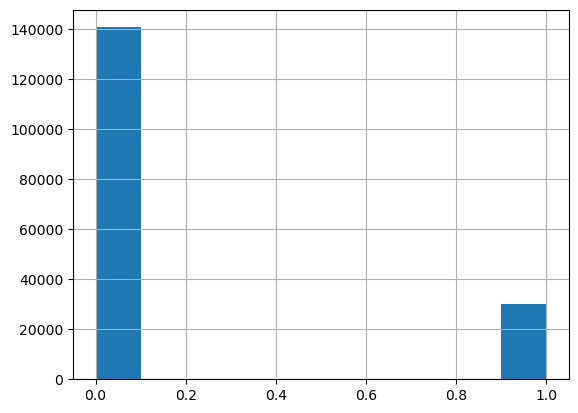

In [4]:
df["churn"].hist()

In [5]:
X = df.drop('churn',axis=1).values
y = df['churn'].values

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

In [7]:
df_train_x = pd.DataFrame(X_train, columns=df.drop('churn',axis=1).columns)

In [8]:
df_train_x

,age,marital_status,job_position,credit_sum,credit_length,scoring,education,tariff_id,region,average_region_wage,income,credit_count,overdue_count
0,38.0,3.0,15.0,12340.91,12.0,0.365170,2.0,20.0,73.0,56000.0,43000.0,1.0,0.0
1,33.0,4.0,14.0,12118.00,10.0,0.507244,4.0,2.0,46.0,28160.0,20000.0,0.0,0.0
2,50.0,4.0,14.0,11691.00,6.0,0.382806,4.0,25.0,4.0,27390.0,12000.0,1.0,0.0
3,39.0,4.0,14.0,87467.00,12.0,0.508112,4.0,2.0,29.0,55880.0,80000.0,2.0,0.0
4,65.0,3.0,15.0,44879.00,10.0,0.491978,4.0,28.0,17.0,27060.0,45000.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
128053,45.0,3.0,15.0,45978.00,10.0,0.429848,4.0,2.0,22.0,22550.0,25000.0,3.0,0.0
128054,59.0,4.0,10.0,27980.00,14.0,0.446021,2.0,1.0,62.0,27060.0,10500.0,0.0,0.0
128055,27.0,3.0,14.0,22756.00,15.0,0.520948,4.0,2.0,46.0,28160.0,25000.0,0.0,0.0
128056,36.0,3.0,14.0,55189.00,12.0,0.457322,2.0,2.0,63.0,45430.0,70000.0,2.0,0.0


In [9]:
df_train_y = pd.DataFrame(y_train, columns=['churn'])

In [10]:
df_train_y

,churn
0,0
1,0
2,0
3,0
4,0
...,...
128053,0
128054,0
128055,0
128056,0


In [11]:
df_train = pd.concat([df_train_x, df_train_y], axis=1)

In [12]:
df_train.to_csv("churn_train.csv")

In [19]:
df_test_x = pd.DataFrame(X_test, columns=df.drop('churn',axis=1).columns)

In [20]:
df_test_x.to_csv("churn_test.csv")

In [21]:
df_test_y = pd.DataFrame(y_test, columns=['churn'])

In [22]:
df_test_y.to_csv("churn_y_true.csv")

In [23]:
df_test = pd.concat([df_test_x, df_test_y], axis=1)

In [27]:
df_test.dropna()[['churn']].to_csv("churn_y_true_dropna.csv")

In [28]:
test2 = df_test.copy()
test2['credit_count'] = test2['credit_count'].interpolate()
test2['overdue_count'] = test2['overdue_count'].interpolate()
test2 = test2.dropna()
test2.to_csv('churn_y_true2.csv')